In [1]:
#|default_exp app

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
cat = '/content/drive/MyDrive/2023.1/IA/LIA/Aula 14/cat.jpg'
model = '/content/drive/MyDrive/2023.1/IA/LIA/Aula 14/model.pkl'

In [20]:
!pip install -q timm
!pip install -q gradio
!pip install -q nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.8 MB/s eta 0:00:00


## Gradio Pets

In [4]:
#|export
from fastai.vision.all import *
import gradio as gr
import timm

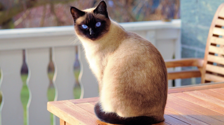

In [6]:
im = PILImage.create(cat)
im.thumbnail((224,224))
im

In [8]:
#export
learn = load_learner(model)

In [9]:
learn.predict(im)

('Siamese',
 tensor(10),
 tensor([1.7911e-07, 4.3327e-07, 3.8542e-05, 1.4647e-04, 3.5676e-07, 1.4461e-07,
         1.8989e-08, 1.8756e-08, 1.9069e-04, 1.1367e-06, 9.9962e-01, 3.7373e-07,
         1.1937e-07, 4.2634e-08, 5.5222e-08, 2.2955e-07, 3.1278e-08, 6.0004e-08,
         6.1932e-08, 3.6139e-08, 2.4442e-07, 1.5483e-07, 6.6207e-08, 2.2972e-07,
         1.7757e-07, 1.5169e-07, 3.0988e-08, 2.8854e-07, 1.5254e-07, 5.4054e-07,
         2.5298e-08, 5.0404e-08, 2.7548e-07, 1.2424e-06, 4.8019e-08, 1.4699e-07,
         4.8645e-07]))

In [10]:
#export
categories = learn.dls.vocab

def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))

In [11]:
classify_image(im)

{'Abyssinian': 1.7910828375988785e-07,
 'Bengal': 4.332695198172587e-07,
 'Birman': 3.854189344565384e-05,
 'Bombay': 0.00014647356874775141,
 'British_Shorthair': 3.5676336551659915e-07,
 'Egyptian_Mau': 1.446130255544631e-07,
 'Maine_Coon': 1.89891924406993e-08,
 'Persian': 1.8755578423679253e-08,
 'Ragdoll': 0.00019069042173214257,
 'Russian_Blue': 1.1366887520125601e-06,
 'Siamese': 0.9996168613433838,
 'Sphynx': 3.737297049610788e-07,
 'american_bulldog': 1.193664758147861e-07,
 'american_pit_bull_terrier': 4.2633530483726645e-08,
 'basset_hound': 5.522189638895725e-08,
 'beagle': 2.295450798328602e-07,
 'boxer': 3.127798109403557e-08,
 'chihuahua': 6.000365715408407e-08,
 'english_cocker_spaniel': 6.193211277150112e-08,
 'english_setter': 3.613908816646472e-08,
 'german_shorthaired': 2.444210167595884e-07,
 'great_pyrenees': 1.5482875426187093e-07,
 'havanese': 6.620715709004799e-08,
 'japanese_chin': 2.2971939017679688e-07,
 'keeshond': 1.7757214720859338e-07,
 'leonberger': 1.5

In [14]:
#export
image = gr.inputs.Image(shape=(192, 192))
label = gr.outputs.Label()
examples = [cat]

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


In [15]:
#export
intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


In [16]:
m = learn.model
m

Sequential(
  (0): TimmBody(
    (model): ConvNeXt(
      (stem): Sequential(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (stages): Sequential(
        (0): ConvNeXtStage(
          (downsample): Identity()
          (blocks): Sequential(
            (0): ConvNeXtBlock(
              (conv_dw): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
              (norm): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
              (mlp): Mlp(
                (fc1): Linear(in_features=96, out_features=384, bias=True)
                (act): GELU()
                (drop1): Dropout(p=0.0, inplace=False)
                (norm): Identity()
                (fc2): Linear(in_features=384, out_features=96, bias=True)
                (drop2): Dropout(p=0.0, inplace=False)
              )
              (shortcut): Identity()
              (drop_path): Identity()
          

In [17]:
l = m.get_submodule('0.model.stem.1')
list(l.parameters())

[Parameter containing:
 tensor([ 1.2567e+00,  1.9179e+00,  1.2188e+00,  1.0387e+00, -2.2018e-03,
          7.6673e-01,  8.8824e-01,  1.6315e+00,  7.0514e-01,  3.2884e+00,
          7.8440e-01,  4.5834e-04,  9.9929e-01, -1.3068e-03,  3.2980e+00,
         -4.9512e-05,  1.9836e+00,  1.0211e+00,  4.4527e+00,  2.5639e-01,
          2.7257e+00,  9.2627e-01,  1.2365e+00,  4.6838e-03,  1.7862e+00,
          5.4396e-01,  4.6253e+00,  1.1564e-02, -2.8269e-04,  3.4508e+00,
          1.3514e+00,  4.1263e+00,  2.6875e+00,  4.1199e+00,  3.4001e+00,
          8.4947e-01,  7.3637e-01,  3.9789e+00,  1.2860e+00,  6.4012e-01,
          2.6893e+00,  1.1181e+00,  1.1697e+00,  5.5371e-01,  2.3346e+00,
          7.8302e-04,  9.6934e-01,  4.5313e-04,  1.1978e+00,  1.7887e+00,
          4.0164e-01,  4.5080e-01,  9.7184e-01,  3.9892e+00,  6.5867e-01,
          6.8703e-01,  9.8532e-01,  2.7063e+00,  1.2169e+00,  7.6213e-01,
          3.3021e+00,  1.6204e+00,  9.5543e-01,  2.1209e+00,  6.3013e-01,
          4.032

In [18]:
l = m.get_submodule('0.model.stages.0.blocks.1.mlp.fc1')
list(l.parameters())

[Parameter containing:
 tensor([[ 0.0225, -0.0017,  0.0404,  ...,  0.0016, -0.0452,  0.0080],
         [-0.1439,  0.0169,  0.0260,  ...,  0.0125, -0.1044,  0.0562],
         [-0.0655, -0.0328,  0.0057,  ..., -0.0416,  0.0659, -0.0402],
         ...,
         [-0.0089,  0.0699,  0.0003,  ...,  0.0041,  0.0415, -0.0191],
         [ 0.0020,  0.0320,  0.0297,  ..., -0.0298, -0.0305,  0.0553],
         [ 0.1211, -0.0354, -0.0044,  ..., -0.0063,  0.0238, -0.0114]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.4047, -0.7419, -0.4235, -0.1651, -0.3027, -0.1899, -0.5533, -0.6270,
         -0.3007, -0.4254, -0.5995, -0.4107, -0.2173, -1.7934, -0.3172, -0.1164,
         -0.4482, -0.2848, -0.4344, -0.4945, -0.4063, -1.1401, -0.6754, -1.7236,
         -0.2954, -0.2655, -0.2188, -0.3913, -0.4148, -0.4771,  0.2364, -0.7542,
         -0.5851, -0.1821, -1.5272, -0.3625, -2.4688, -2.3461, -0.6108, -0.4115,
         -0.6964, -0.5764, -0.5876, -0.0319, -2.0354, -0.2859, -0.3953, -0.8404

In [21]:
import nbdev

In [22]:
nbdev.export.nb_export('/content/drive/MyDrive/2023.1/IA/LIA/Aula 14/Aula14-Gerando_app_deploy.ipynb', 'Pets')
print('Exportação concluída !')

Exportação concluída !
